# Setup

In [1]:
%display latex

In [2]:
import sys, os, warnings
from contextlib import contextmanager

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout


@contextmanager
def suppress_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield

In [3]:
from lbuc import *
from lbuc.bondcalculus import *

## Model

In [4]:
m = BondModel("WhelksAndLobsters.bond")

Running cmd: 'load "WhelksAndLobsters.bond"' ...


In [5]:
p = m.process("[1, 1.2] Whelk || [4, 6] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)")

In [6]:
s = p.as_system

Running cmd: 'savesage "[1, 1.2] Whelk || [4, 6] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)" "/tmp/bond-sage-script-f02kscl4.py"' ...


In [7]:
u = (x, y) = reversed(s.x)

In [8]:
vf = vector(reversed(s.y)); vf

(0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1, -2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0)

In [9]:
def plot_box(B, **kwargs):
    if 'color' not in kwargs:
        kwargs['color'] = 'orange'
    return polygon(
        [(B[0].lower(), B[1].lower()),
         (B[0].lower(), B[1].upper()),
         (B[0].upper(), B[1].upper()),
         (B[0].upper(), B[1].lower())],
        **kwargs,
    )

In [10]:
v2 = [RIF(1,1.2), RIF(4,6)]
v3 = v2 # [RIF(1,1.1), RIF(4,5)]
v4 = [RIF(0.2, 0.4), RIF(7, 8)]
v5 = [RIF(0.4, 1.0), RIF(6, 7)]
v6 = [RIF(0.2, 0.6), RIF(2, 3)]

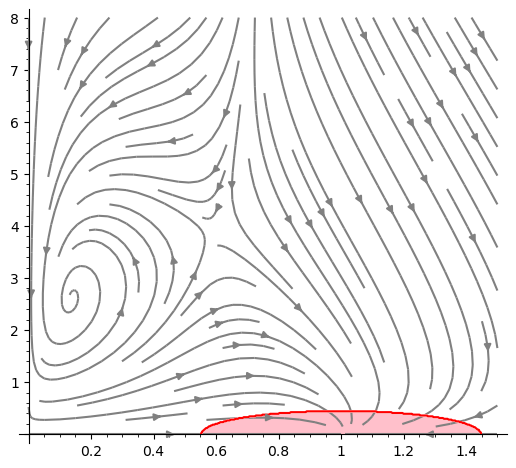

In [11]:
p = streamline_plot(tuple(vf), (x,0,1.5), (y,0,8), color='grey')\
    + region_plot((lambda x, y: (x - 1)^2 + y^2 - 0.2 < 0),
                  (x, 0, 1.5),
                  (y, 0, 8),
                  incol='pink', plot_points=500, bordercol='red')
p.set_aspect_ratio(1/6)
p.show()

## Properties and Parameters

In [12]:
P = Atomic((var("Whelk") - 1)^2 + var("Lobster")^2 < 0.2)

In [13]:
Qbox = [RIF(0, 0.3), RIF(1.75, 3.5)]

In [14]:
Q = (  Atomic(var("Whelk") < Qbox[0].upper())
     & Atomic(var("Whelk") > Qbox[0].lower())
     & Atomic(var("Lobster") < Qbox[1].upper())
     & Atomic(var("Lobster") > Qbox[1].lower()) )

In [15]:
kwargs = dict(step=(0.01, 0.1), order=6, estimation=1e-4, cutoff_threshold=1e-15, integration_method=2)

## Nested Contexts Experiment

In [16]:
s3 = m.process("[0.2, 1.4] Whelk with network N(0.8, 0.6, 0.3, 0.05, 2)").as_system

Running cmd: 'savesage "[0.2, 1.4] Whelk with network N(0.8, 0.6, 0.3, 0.05, 2)" "/tmp/bond-sage-script-lrij28al.py"' ...


In [17]:
import time

In [18]:
prop = "[0, 2] Lobster" >> F(RIF(0, 5), G(RIF(0, 5), P))

def ctx_ref(prop, system, duration, refine_ctx, refine):
    t0 = time.perf_counter()
    csig = prop.context_signal_for_system(system, duration, **kwargs, refine=refine_ctx, verbosity=0, epsilon_ctx=0.1)
    sig = csig.refined_signal(refine)
    t1 = time.perf_counter()
    return sig, t1 - t0

In [19]:
ress = [
    [ctx_ref(prop, s3, 5, i, j)
        for i in range(3)]
    for j in range(3)
]

Running cmd: 'savesage "([-1 .. 1] Whelk || { growWhelk at rate NLGrowth([0.6 .. 0.6000000000000001]); dieWhelk || beLobster at rate RRPredation([0.3 .. 0.30000000000000004], [0.7999999999999999 .. 0.8]); dieLobster at rate NLDecay([4.9999999999999996e-2 .. 5.0e-2]); beWhelk || growLobster at rate RRPredation(2.0, [0.7999999999999999 .. 0.8]); }) || ([0, 2] Lobster)" "/tmp/bond-sage-script-r4k5viko.py"' ...
Running cmd: 'savesage "[0, 2] Lobster || { growWhelk at rate NLGrowth([0.6 .. 0.6000000000000002]); dieWhelk || beLobster at rate RRPredation([0.3 .. 0.30000000000000004], [0.7999999999999998 .. 0.8]); dieLobster at rate NLDecay([4.9999999999999996e-2 .. 5.0e-2]); beWhelk || growLobster at rate RRPredation(2.0, [0.7999999999999998 .. 0.8]); }" "/tmp/bond-sage-script-9tobncca.py"' ...
Generating Reach Tree: 1 items in 0.00 seconds
mask = None
y0=[0, [0.18263802749484653 .. 1.4843245965602801]]
y0_ctx=[[0 .. 2], None]
Generating Reach Tree: 1 items in 0.00 seconds
Monitoring initial 

In [20]:
ress

[[(Signal([0.0000000000000000 .. 5.0000000000000000], [([4.7675312500000002 .. 4.8456875000000004], True), ([4.9238437499999996 .. 5.0000000000000000], True)], mask=None),
   151.56392875099982),
  (Signal([0.0000000000000000 .. 5.0000000000000000], [([4.6112187499999999 .. 5.0000000000000000], True)], mask=None),
   413.47971040899984),
  (Signal([0.0000000000000000 .. 5.0000000000000000], [([4.6112187499999999 .. 5.0000000000000000], True)], mask=None),
   840.7339675759999)],
 [(Signal([0.0000000000000000 .. 5.0000000000000000], [([4.6112187499999999 .. 5.0000000000000000], True)], mask=None),
   430.2057561109996),
  (Signal([0.0000000000000000 .. 5.0000000000000000], [([4.1422812499999999 .. 5.0000000000000000], True)], mask=None),
   1084.1316357489995),
  (Signal([0.0000000000000000 .. 5.0000000000000000], [([4.1422812499999999 .. 5.0000000000000000], True)], mask=None),
   2011.5526792929995)],
 [(Signal([0.0000000000000000 .. 5.0000000000000000], [([4.5330624999999997 .. 5.0000000000000000], True)], mask=None),
   1221.4663333599992),
  (Signal([0.0000000000000000 .. 5.0000000000000000], [([3.9859687499999996 .. 5.0000000000000000], True)], mask=None),
   2202.802797184999),
  (Signal([0.0000000000000000 .. 5.0000000000000000], [([3.9078124999999999 .. 5.0000000000000000], True)], mask=None),
   3551.887122324999)]]

In [21]:
table([[(sig.values[0][0].lower() if len(sig.values) else None)
        for sig, time in res[0:3]]
       for res in ress[0:3]])

4.76753125000000   4.61121874999999   4.61121874999999
  4.61121874999999   4.14228124999999   4.14228124999999
  4.53306249999999   3.98596874999999   3.90781249999999

In [22]:
table([[time for sig, time in res[0:3]]
       for res in ress[0:3]])

151.56392875099982   413.47971040899984   840.7339675759999
  430.2057561109996    1084.1316357489995   2011.5526792929995
  1221.4663333599992   2202.802797184999    3551.887122324999

In [ ]:
# with suppress_stdout():
csig2 = ("[0, 2] Lobster"
         >> F(RIF(0, 5), G(RIF(0, 5), P))
         ).context_signal_for_system(s3, 5, **kwargs,
                                     refine=2, verbosity=3)

Running cmd: 'savesage "([-1 .. 1] Whelk || { growWhelk at rate NLGrowth([0.6 .. 0.6000000000000001]); dieWhelk || beLobster at rate RRPredation([0.3 .. 0.30000000000000004], [0.7999999999999999 .. 0.8]); dieLobster at rate NLDecay([4.9999999999999996e-2 .. 5.0e-2]); beWhelk || growLobster at rate RRPredation(2.0, [0.7999999999999999 .. 0.8]); }) || ([0, 2] Lobster)" "/tmp/bond-sage-script-184e_108.py"' ...
Running cmd: 'savesage "[0, 2] Lobster || { growWhelk at rate NLGrowth([0.6 .. 0.6000000000000002]); dieWhelk || beLobster at rate RRPredation([0.3 .. 0.30000000000000004], [0.7999999999999998 .. 0.8]); dieLobster at rate NLDecay([4.9999999999999996e-2 .. 5.0e-2]); beWhelk || growLobster at rate RRPredation(2.0, [0.7999999999999998 .. 0.8]); }" "/tmp/bond-sage-script-5jxn5bs3.py"' ...
phi variables sfs = {x0}
system sfs = System(R, (x0), [[0.19999999999999987 .. 1.4000000000000002]], (-0.600000000000000?*x0^2 + 0.600000000000000?*x0), varmap=bidict({'Whelk': x0})))
Generating Reach 

In [ ]:
csig.refined_signal(1)

In [ ]:
_.plot()